In [2]:
!pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os
import numpy as np

In [5]:
base_dir=r"C:\Users\Hp\cat vs dog"

In [6]:
#preprocessing

In [7]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    
    validation_split=0.1
)
    

In [8]:
train_genarator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
    

) 

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [9]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [10]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [11]:
for layer in vgg.layers:
    layer.trainable=False

In [12]:
folders=glob(r"C:\Users\Hp\cat vs dog\*")
print(len(folders))

2


In [13]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
!pip install pillow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.0.0
anyio                        3.7.1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
debugpy                      1.6.7.post1
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.18.0
flatbuffers                  23.5.26
fqdn                        


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.0.0
anyio                        3.7.1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
debugpy                      1.6.7.post1
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.18.0
flatbuffers                  23.5.26
fqdn                        


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import scipy

In [20]:
epoch=10

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/10
113/113 [==============================] - 2981s 26s/step - loss: 0.3292 - accuracy: 0.8562 - val_loss: 0.1759 - val_accuracy: 0.9300
Epoch 2/10
113/113 [==============================] - 3004s 27s/step - loss: 0.2117 - accuracy: 0.9170 - val_loss: 0.1566 - val_accuracy: 0.9362
Epoch 3/10
113/113 [==============================] - 2366s 21s/step - loss: 0.1724 - accuracy: 0.9307 - val_loss: 0.1433 - val_accuracy: 0.9425
Epoch 4/10
113/113 [==============================] - 2077s 18s/step - loss: 0.1632 - accuracy: 0.9352 - val_loss: 0.1750 - val_accuracy: 0.9212
Epoch 5/10
113/113 [==============================] - 2068s 18s/step - loss: 0.1462 - accuracy: 0.9421 - val_loss: 0.1367 - val_accuracy: 0.9375
Epoch 6/10
113/113 [==============================] - 2083s 18s/step - loss: 0.1390 - accuracy: 0.9435 - val_loss: 0.1572 - val_accuracy: 0.9350
Epoch 7/10
113/113 [==============================] - 2067s 18s/step - loss: 0.1279 - accuracy: 0.9523 - val_loss: 0.1393 - val_ac

In [22]:
!pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 656.4 kB/s eta 0:00:12
                                              0.1/7.6 MB 744.7 kB/s eta 0:00:11
                                              0.1/7.6 MB 717.5 kB/s eta 0:00:11
                                              0.2/7.6 MB 817.0 kB/s eta 0:00:10
     -                                        0.2/7.6 MB 737.3 kB/s eta 0:00:11
     -                                        0.3/7.6 MB 1.0 MB/s eta 0:00:08
     -                                        0.4/7.6 MB 1.1 MB/s eta 0:00:07
     --                                       0.5/7.6 MB 1.5 MB/s eta 0:00:05
     ---                                      0.7/7.6 MB 1.6 MB/s eta 0:00:05
     ----                                     0.9/7.6 MB 1.9 MB/s eta 0:00:04
     ----                                     0.9/7.6 MB 1.9 MB/s e

Matplotlib is building the font cache; this may take a moment.


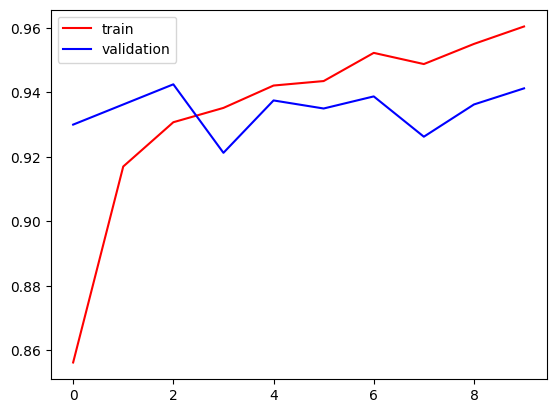

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
#prediction

In [27]:
from keras.preprocessing import image
import numpy as np

img_pred=image.load_img(r"C:\Users\Hp\cat vs dog test\test\test1\4033.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="cat"
    
    
else:
    prediction="dog"
print(prediction)

1/1 [==============================] - 0s 328ms/step
[[0. 1.]]
dog
